## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Cargar la base de datos

excel_file = pd.ExcelFile('Consumo_Abusivo_Sustancias.xlsx')
print(excel_file.sheet_names)

df = excel_file.parse('Pacientes')
print(df.head())

['Pacientes']
   Year  Genero      Localidad  MesNotificacion   Tipo_Seguro  \
0  2015  Hombre           Usme                1  Contributivo   
1  2015   Mujer           Suba                4  Contributivo   
2  2015  Hombre  Puente Aranda                5    Subsidiado   
3  2015   Mujer        Usaquen                5  Contributivo   
4  2015  Hombre           Suba                6  Contributivo   

   Consume_Vivienda  Consume_Parque  Consume_InstitucionEducativa  \
0                 0               1                             0   
1                 1               0                             0   
2                 0               0                             0   
3                 0               0                             0   
4                 0               1                             0   

   Consume_Bares  Consume_ViaPublica  Consume_CasaAmigos  \
0              0                   0                   0   
1              0                   0                   0   


In [3]:
# Composición de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88042 entries, 0 to 88041
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          88042 non-null  int64 
 1   Genero                        88038 non-null  object
 2   Localidad                     88022 non-null  object
 3   MesNotificacion               88042 non-null  int64 
 4   Tipo_Seguro                   88042 non-null  object
 5   Consume_Vivienda              88042 non-null  int64 
 6   Consume_Parque                88042 non-null  int64 
 7   Consume_InstitucionEducativa  88042 non-null  int64 
 8   Consume_Bares                 88042 non-null  int64 
 9   Consume_ViaPublica            88042 non-null  int64 
 10  Consume_CasaAmigos            88042 non-null  int64 
 11  Nivel_Educativo               88042 non-null  object
 12  Etapa_Vida                    88042 non-null  object
 13  Inicio_Tratamien

## Análisis de las variables

### 1. Limpieza
Retirar registros nulos o etiquetados como "N.A.", "Sin dato", "Sin informacion", etc.

In [4]:
# Género
df.dropna(subset=['Genero', 'Localidad'], inplace=True)

# Localidad
df = df[df['Localidad'] != 'N.A.']
df = df[df['Localidad'] != 'Sin dato']

# Tipo seguro
df = df[df['Tipo_Seguro'] != 'Sin Informacion']

# Nivel educativo
df = df[df['Nivel_Educativo'] != '99. Sin dato']

# Inicio tratamiento
df = df[df['Inicio_Tratamiento'] != '99. Sin dato']

# Estado civil
df = df[df['EstadoCivil'] != '99. Sin dato']

Retirar registros del año 2025 por su incompletitud

In [5]:
df = df[df['Year'] != 2025]

In [6]:
print(df.shape)

(66812, 18)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66812 entries, 0 to 85047
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          66812 non-null  int64 
 1   Genero                        66812 non-null  object
 2   Localidad                     66812 non-null  object
 3   MesNotificacion               66812 non-null  int64 
 4   Tipo_Seguro                   66812 non-null  object
 5   Consume_Vivienda              66812 non-null  int64 
 6   Consume_Parque                66812 non-null  int64 
 7   Consume_InstitucionEducativa  66812 non-null  int64 
 8   Consume_Bares                 66812 non-null  int64 
 9   Consume_ViaPublica            66812 non-null  int64 
 10  Consume_CasaAmigos            66812 non-null  int64 
 11  Nivel_Educativo               66812 non-null  object
 12  Etapa_Vida                    66812 non-null  object
 13  Inicio_Tratamiento   

2. Análisis gráfico del comportamiento de las variables

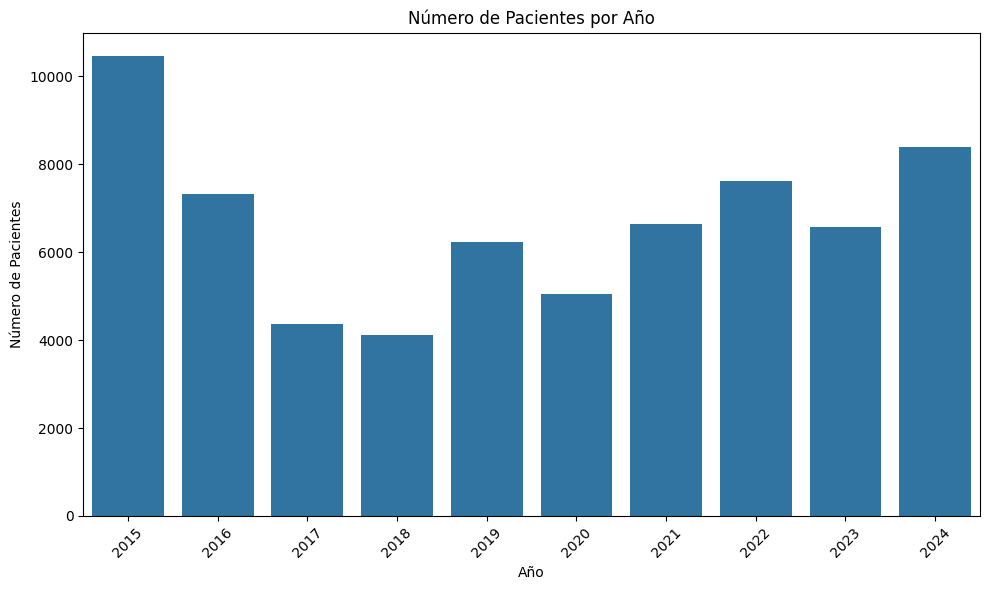

In [8]:
# Pacientes registrados por año

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Número de Pacientes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

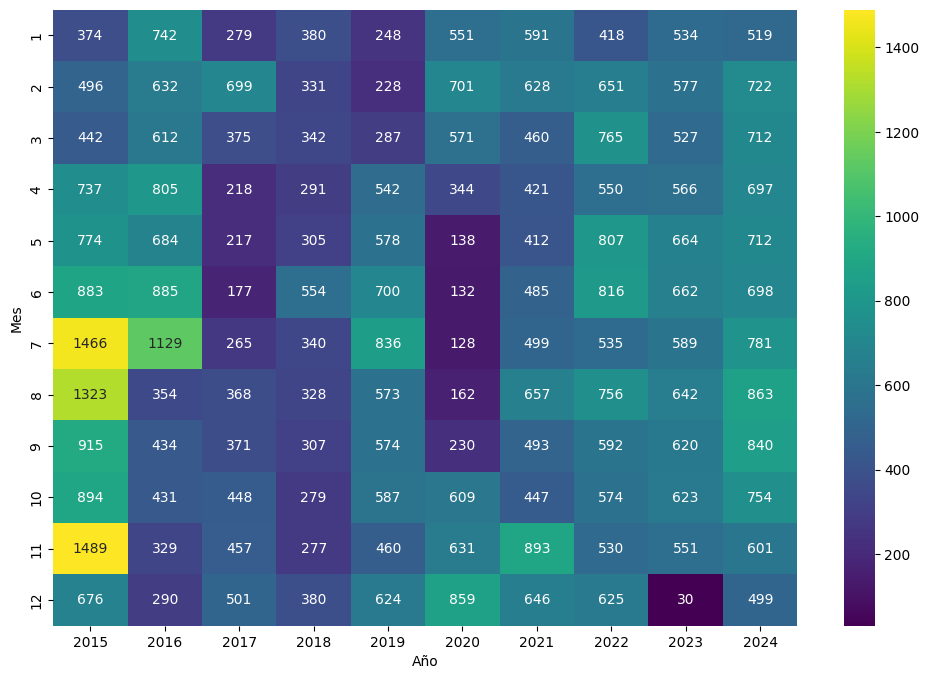

In [ ]:
# Pacientes registrados por mes y año
heatmap_data = df.groupby(['MesNotificacion','Year']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

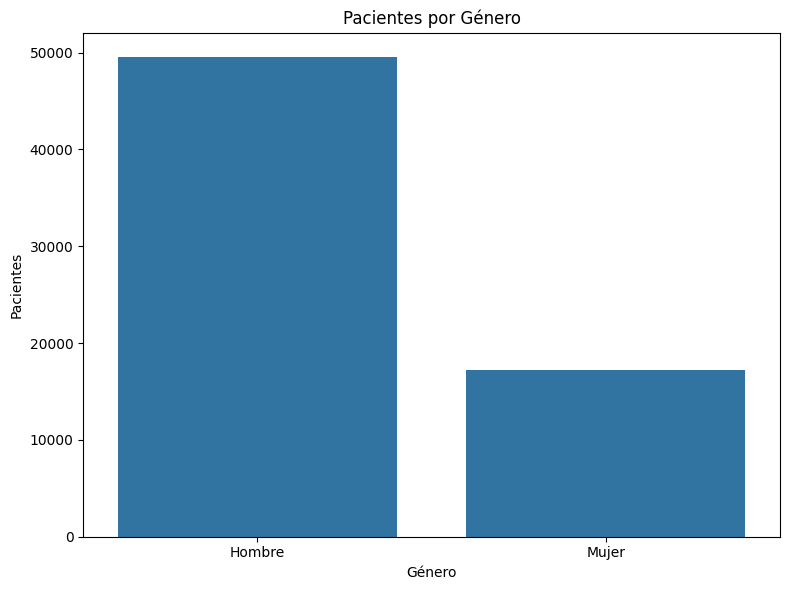

In [ ]:
# Pacientes por género

gender_counts = df['Genero'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Pacientes por Género')
plt.xlabel('Género')
plt.ylabel('Pacientes')
plt.tight_layout()
plt.show()

In [9]:
import geopandas as gpd
import folium

# Cargar la base de datos con los barrios de Bogotá
# Asegúrate de que tienes un archivo GeoJSON o Shapefile con los límites de los barrios
archivo_mapa = "/content/Consumo_Abusivo_Sustancias.xlsx"  # Reemplázalo con tu archivo
gdf = gpd.read_file(archivo_mapa)

# Crear el mapa centrado en Bogotá
mapa_bogota = folium.Map(location=[4.710989, -74.072092], zoom_start=12)

# Agregar los barrios al mapa
folium.GeoJson(gdf, name="Barrios de Bogotá").add_to(mapa_bogota)

# Mostrar el mapa
mapa_bogota


ValueError: Cannot render objects with any missing geometries:        Year  Genero      Localidad  MesNotificacion   Tipo_Seguro  \
0      2015  Hombre           Usme                1  Contributivo   
1      2015   Mujer           Suba                4  Contributivo   
2      2015  Hombre  Puente Aranda                5    Subsidiado   
3      2015   Mujer        Usaquen                5  Contributivo   
4      2015  Hombre           Suba                6  Contributivo   
...     ...     ...            ...              ...           ...   
88037  2025  Hombre        Usaquen                2  Contributivo   
88038  2025  Hombre        Kennedy                3    Subsidiado   
88039  2025   Mujer  San Cristobal                3  Contributivo   
88040  2025  Hombre        Kennedy                3  Contributivo   
88041  2025   Mujer        Kennedy                3  Contributivo   

       Consume_Vivienda  Consume_Parque  Consume_InstitucionEducativa  \
0                     0               1                             0   
1                     1               0                             0   
2                     0               0                             0   
3                     0               0                             0   
4                     0               1                             0   
...                 ...             ...                           ...   
88037                 0               0                             0   
88038                 0               0                             0   
88039                 1               0                             0   
88040                 1               0                             0   
88041                 0               0                             0   

       Consume_Bares  Consume_ViaPublica  Consume_CasaAmigos  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  1                   1                   1   
3                  1                   0                   0   
4                  0                   0                   0   
...              ...                 ...                 ...   
88037              1                   0                   0   
88038              0                   1                   1   
88039              0                   0                   0   
88040              0                   1                   1   
88041              0                   1                   1   

                 Nivel_Educativo    Etapa_Vida  \
0       5. Secundaria incompleta  Adolescencia   
1       5. Secundaria incompleta  Adolescencia   
2       5. Secundaria incompleta       Adultez   
3      9. Universidad incompleta      Juventud   
4       5. Secundaria incompleta  Adolescencia   
...                          ...           ...   
88037   10. Universidad completa      Juventud   
88038     6. Secundaria completa      Juventud   
88039   5. Secundaria incompleta  Adolescencia   
88040  9. Universidad incompleta      Juventud   
88041     6. Secundaria completa      Juventud   

                        Inicio_Tratamiento            UPZ     EstadoCivil  \
0                       1. Voluntariamente        DANUBIO  1. Soltero (a)   
1                       1. Voluntariamente           SUBA  1. Soltero (a)   
2      3. Lo llevaron amigos o voluntarios       Sin Dato  1. Soltero (a)   
3                       1. Voluntariamente  SANTA BARBARA  1. Soltero (a)   
4                       1. Voluntariamente      EL RINCON  1. Soltero (a)   
...                                    ...            ...             ...   
88037                   1. Voluntariamente     LOS CEDROS  1. Soltero (a)   
88038                   1. Voluntariamente         TIMIZA  1. Soltero (a)   
88039                   1. Voluntariamente    20 DE JULIO  1. Soltero (a)   
88040                   1. Voluntariamente   PATIO BONITO  1. Soltero (a)   
88041                   1. Voluntariamente       AMERICAS  6. Union libre   

       Num_Casos Num_Casos_Rango  
0              1             Uno  
1              1             Uno  
2              1             Uno  
3              1             Uno  
4             12         2 o mas  
...          ...             ...  
88037          1             Uno  
88038          1             Uno  
88039          1             Uno  
88040          1             Uno  
88041          1             Uno  

[88042 rows x 18 columns]

In [16]:
df["Localidad"] = df["Localidad"].str.strip().str.lower()
gdf["NOMBRE_LOCALIDAD"] = gdf["NOMBRE_LOCALIDAD"].str.strip().str.lower()


KeyError: 'NOMBRE_LOCALIDAD'

In [14]:
import geopandas as gpd
import folium

# Cargar el archivo de las localidades de Bogotá (GeoJSON o Shapefile)
archivo_mapa = "/content/Consumo_Abusivo_Sustancias.xlsx"  # Asegúrate de tener un archivo con los límites de las localidades
gdf = gpd.read_file(archivo_mapa)

# Contar los pacientes por localidad
localidades_count = df['Localidad'].value_counts().reset_index()
localidades_count.columns = ['Localidad', 'Pacientes']

# Unir los datos de pacientes con el mapa de localidades
gdf = gdf.merge(localidades_count, left_on='Localidad', right_on='Localidad', how='left')

# Crear el mapa centrado en Bogotá
mapa_bogota = folium.Map(location=[4.710989, -74.072092], zoom_start=11)

# Agregar las localidades coloreadas según el número de pacientes
folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['Localidad', 'Pacientes'],
    key_on='feature.properties.Localidad',
    fill_color='YlOrRd',  # Color de calor (amarillo a rojo)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Número de Pacientes por Localidad"
).add_to(mapa_bogota)

# Agregar nombres de localidades con marcadores
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f"{row['Localidad']}: {row['Pacientes']} pacientes",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(mapa_bogota)

# Mostrar

ValueError: Cannot render objects with any missing geometries:        Year  Genero      Localidad  MesNotificacion   Tipo_Seguro  \
0      2015  Hombre           Usme                1  Contributivo   
1      2015   Mujer           Suba                4  Contributivo   
2      2015  Hombre  Puente Aranda                5    Subsidiado   
3      2015   Mujer        Usaquen                5  Contributivo   
4      2015  Hombre           Suba                6  Contributivo   
...     ...     ...            ...              ...           ...   
88037  2025  Hombre        Usaquen                2  Contributivo   
88038  2025  Hombre        Kennedy                3    Subsidiado   
88039  2025   Mujer  San Cristobal                3  Contributivo   
88040  2025  Hombre        Kennedy                3  Contributivo   
88041  2025   Mujer        Kennedy                3  Contributivo   

       Consume_Vivienda  Consume_Parque  Consume_InstitucionEducativa  \
0                     0               1                             0   
1                     1               0                             0   
2                     0               0                             0   
3                     0               0                             0   
4                     0               1                             0   
...                 ...             ...                           ...   
88037                 0               0                             0   
88038                 0               0                             0   
88039                 1               0                             0   
88040                 1               0                             0   
88041                 0               0                             0   

       Consume_Bares  Consume_ViaPublica  Consume_CasaAmigos  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  1                   1                   1   
3                  1                   0                   0   
4                  0                   0                   0   
...              ...                 ...                 ...   
88037              1                   0                   0   
88038              0                   1                   1   
88039              0                   0                   0   
88040              0                   1                   1   
88041              0                   1                   1   

                 Nivel_Educativo    Etapa_Vida  \
0       5. Secundaria incompleta  Adolescencia   
1       5. Secundaria incompleta  Adolescencia   
2       5. Secundaria incompleta       Adultez   
3      9. Universidad incompleta      Juventud   
4       5. Secundaria incompleta  Adolescencia   
...                          ...           ...   
88037   10. Universidad completa      Juventud   
88038     6. Secundaria completa      Juventud   
88039   5. Secundaria incompleta  Adolescencia   
88040  9. Universidad incompleta      Juventud   
88041     6. Secundaria completa      Juventud   

                        Inicio_Tratamiento            UPZ     EstadoCivil  \
0                       1. Voluntariamente        DANUBIO  1. Soltero (a)   
1                       1. Voluntariamente           SUBA  1. Soltero (a)   
2      3. Lo llevaron amigos o voluntarios       Sin Dato  1. Soltero (a)   
3                       1. Voluntariamente  SANTA BARBARA  1. Soltero (a)   
4                       1. Voluntariamente      EL RINCON  1. Soltero (a)   
...                                    ...            ...             ...   
88037                   1. Voluntariamente     LOS CEDROS  1. Soltero (a)   
88038                   1. Voluntariamente         TIMIZA  1. Soltero (a)   
88039                   1. Voluntariamente    20 DE JULIO  1. Soltero (a)   
88040                   1. Voluntariamente   PATIO BONITO  1. Soltero (a)   
88041                   1. Voluntariamente       AMERICAS  6. Union libre   

       Num_Casos Num_Casos_Rango  Pacientes  
0              1             Uno     3807.0  
1              1             Uno     5354.0  
2              1             Uno     3748.0  
3              1             Uno     2221.0  
4             12         2 o mas     5354.0  
...          ...             ...        ...  
88037          1             Uno     2221.0  
88038          1             Uno     5701.0  
88039          1             Uno     4238.0  
88040          1             Uno     5701.0  
88041          1             Uno     5701.0  

[88042 rows x 19 columns]

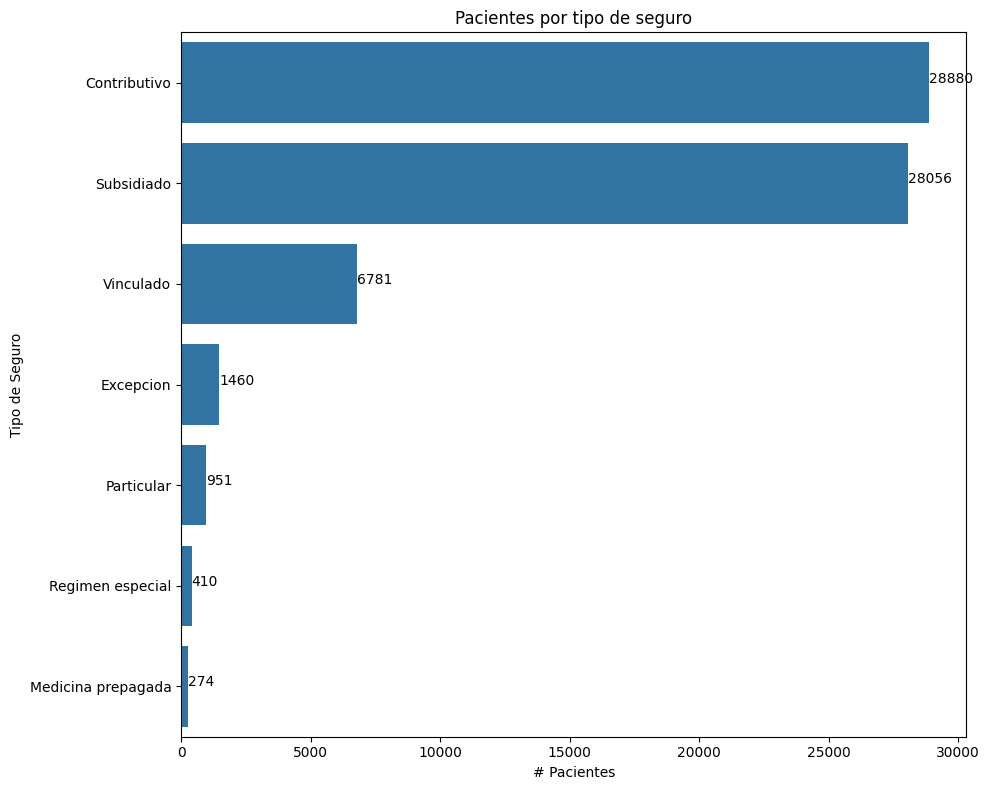

In [ ]:
# Pacientes por tipo de seguro

tipo_seguro_count = df['Tipo_Seguro'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=tipo_seguro_count.values, y=tipo_seguro_count.index, orient='h')
plt.title('Pacientes por tipo de seguro', fontsize=12)
plt.xlabel('# Pacientes')
plt.ylabel('Tipo de Seguro')

# Mostrar valores en las barras
for index, value in enumerate(tipo_seguro_count.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

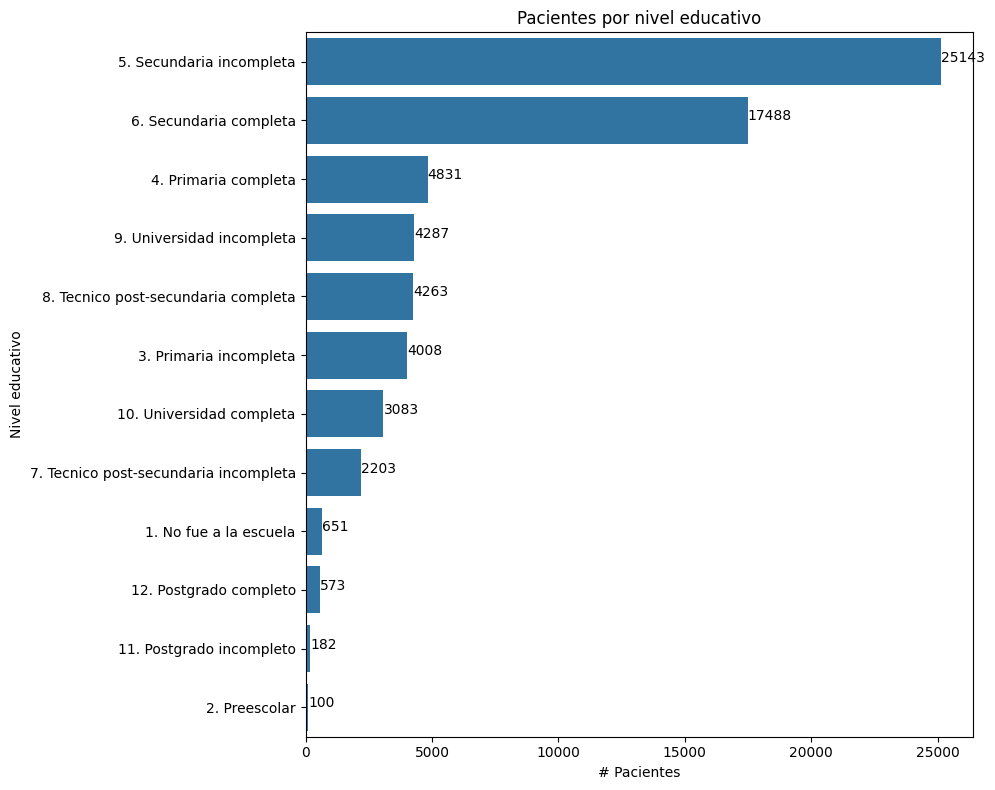

In [ ]:
# Pacientes por nivel educativo

nivel_educativo_count = df['Nivel_Educativo'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=nivel_educativo_count.values, y=nivel_educativo_count.index, orient='h')
plt.title('Pacientes por nivel educativo', fontsize=12)
plt.xlabel('# Pacientes')
plt.ylabel('Nivel educativo')

# Mostrar valores en las barras
for index, value in enumerate(nivel_educativo_count.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

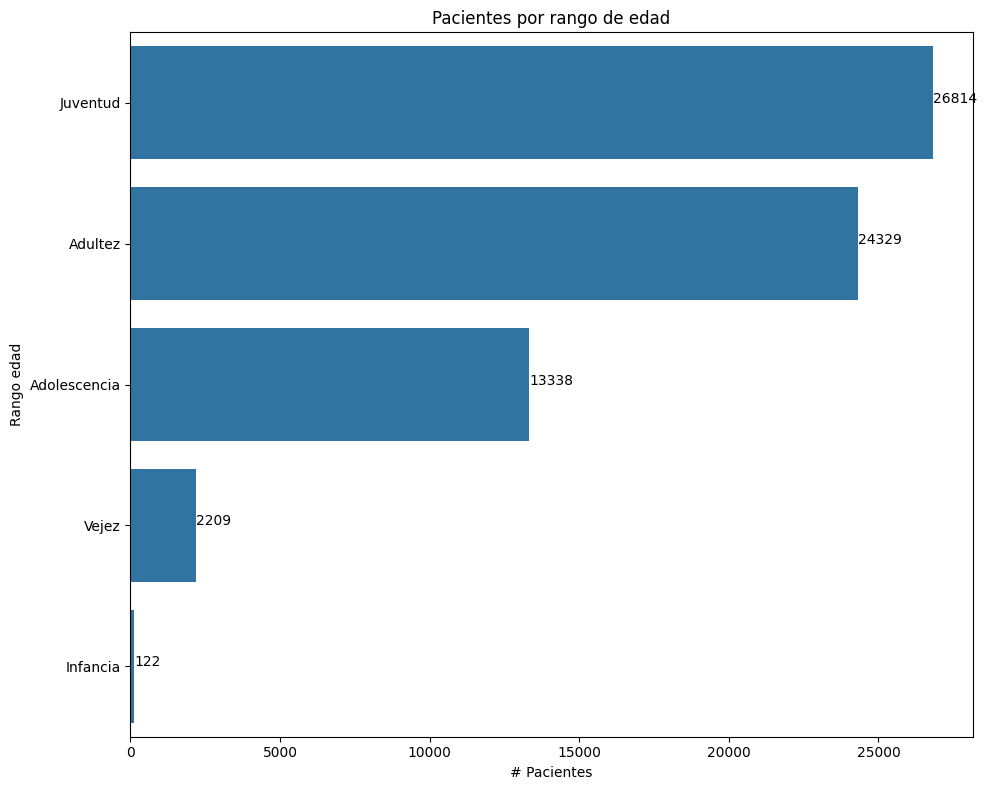

In [ ]:
# Pacientes por rango de edad

rango_edad_count = df['Etapa_Vida'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=rango_edad_count.values, y=rango_edad_count.index, orient='h')
plt.title('Pacientes por rango de edad', fontsize=12)
plt.xlabel('# Pacientes')
plt.ylabel('Rango edad')

# Mostrar valores en las barras
for index, value in enumerate(rango_edad_count.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

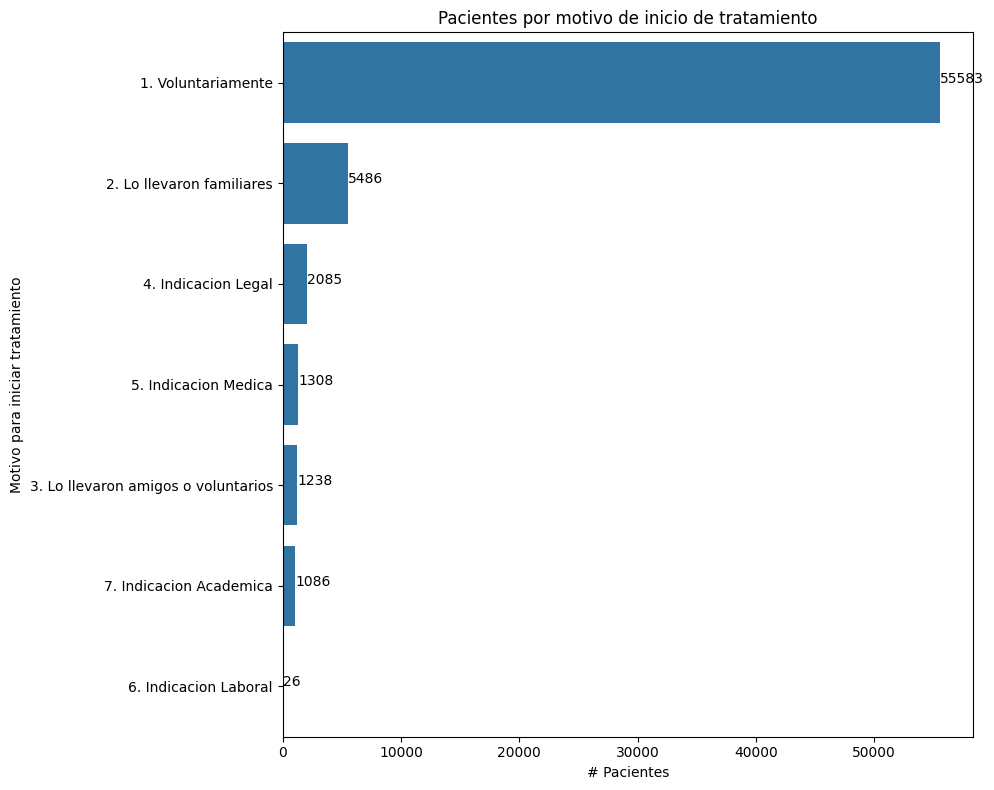

In [ ]:
# Pacientes por motivo de inicio de tratamiento

motivo_tratamiento_count = df['Inicio_Tratamiento'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=motivo_tratamiento_count.values, y=motivo_tratamiento_count.index, orient='h')
plt.title('Pacientes por motivo de inicio de tratamiento', fontsize=12)
plt.xlabel('# Pacientes')
plt.ylabel('Motivo para iniciar tratamiento')

# Mostrar valores en las barras
for index, value in enumerate(motivo_tratamiento_count.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

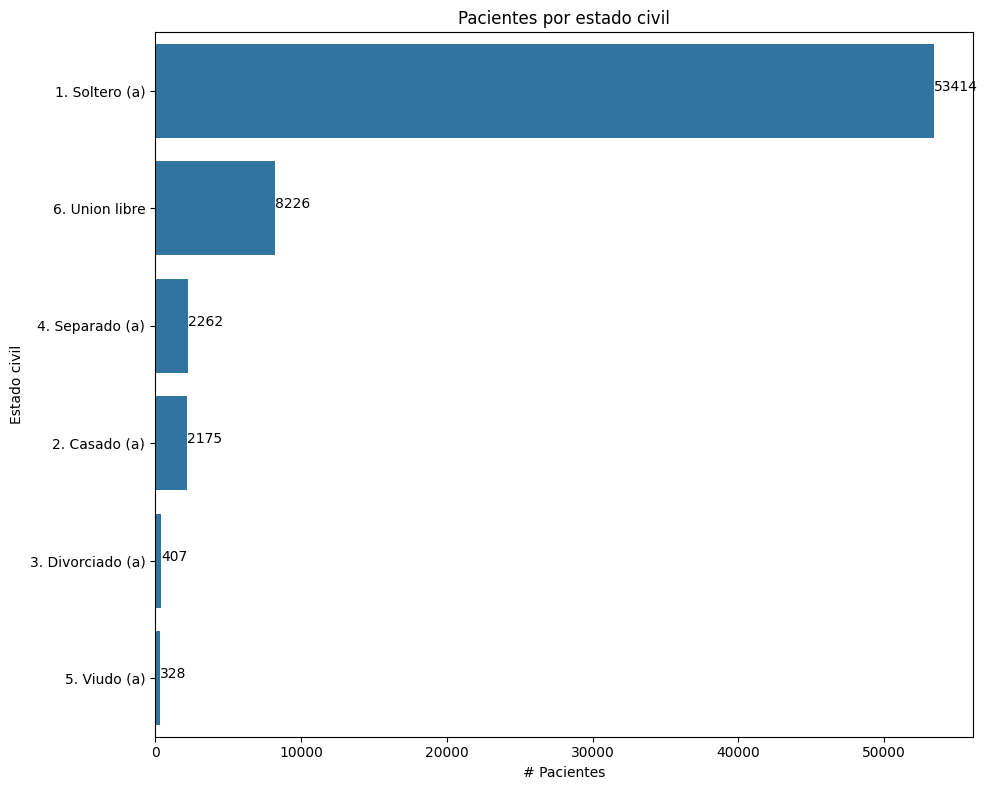

In [ ]:
# Pacientes por estado civil

estado_civil_count = df['EstadoCivil'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=estado_civil_count.values, y=estado_civil_count.index, orient='h')
plt.title('Pacientes por estado civil', fontsize=12)
plt.xlabel('# Pacientes')
plt.ylabel('Estado civil')

# Mostrar valores en las barras
for index, value in enumerate(estado_civil_count.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

In [ ]:
print(df['Num_Casos'].value_counts())

Num_Casos
1     61618
2      3436
3       880
4       363
5       150
6       107
7        62
9        41
8        31
10       22
12       16
11       14
14       12
13       11
15        9
16        5
18        5
19        5
21        3
26        3
22        3
27        3
17        2
20        2
23        1
29        1
25        1
41        1
32        1
30        1
54        1
46        1
39        1
Name: count, dtype: int64


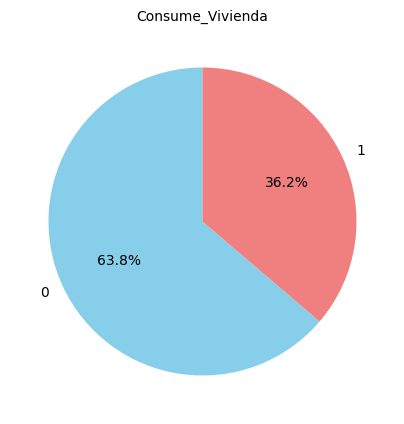

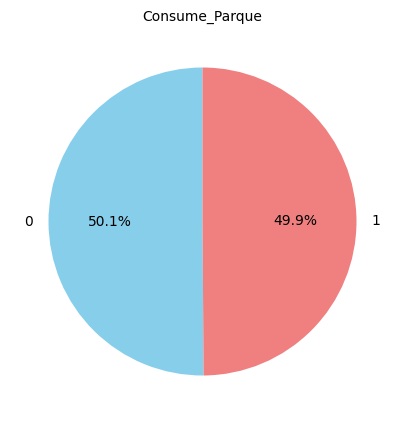

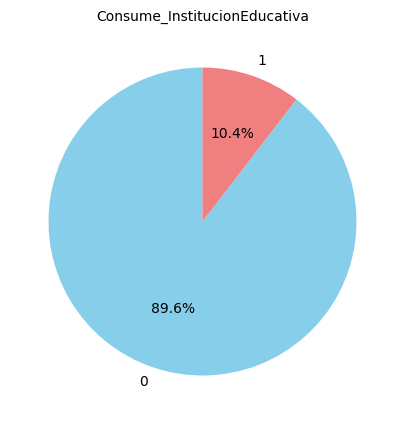

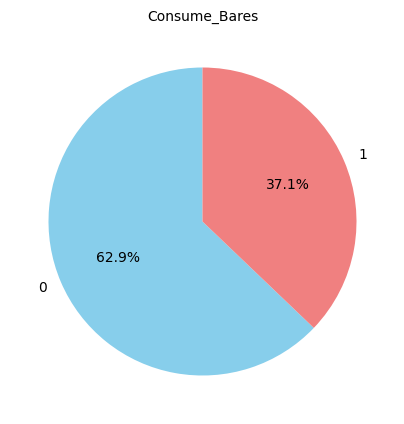

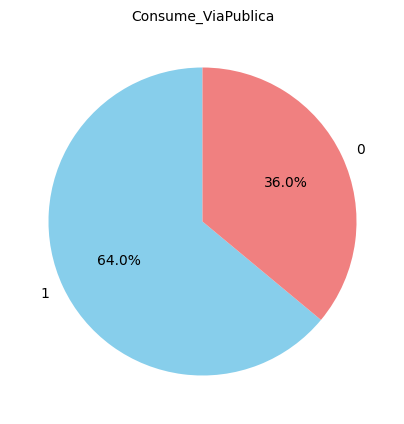

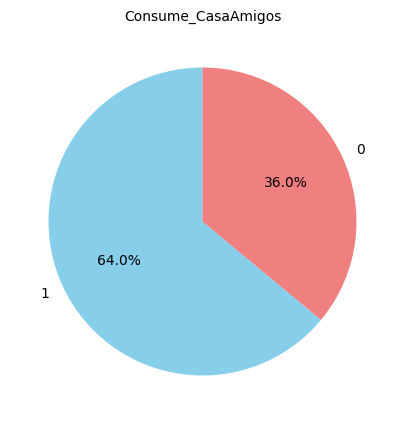

In [ ]:
# Consumo en diferentes lugares
boolean_cols = ['Consume_Vivienda', 'Consume_Parque', 'Consume_InstitucionEducativa', 'Consume_Bares', 'Consume_ViaPublica', 'Consume_CasaAmigos']

for col in boolean_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title(f'{col}', fontsize=10)
    plt.ylabel('')
    plt.show()

### Reducción de variables categóricas

Aplicamos el principio de Pareto para reducir las categorías con muchos valores de baja frecuencia.

In [ ]:
# Agrupacion de localidades

localidades_a_agrupar = ['Fontibon', 'Rafael Uribe', 'Usaquen', 'Tunjuelito', 'Teusaquillo', 'Chapinero', 'Barrios Unidos', 'Candelaria', 'Antonio Narino','Sumapaz']
df['Localidad_R'] = df['Localidad'].apply(lambda x: 'Otra' if x in localidades_a_agrupar else x)
print(df['Localidad_R'].value_counts())

Localidad_R
Otra              17915
Bosa               6178
Ciudad Bolivar     5783
Martires           5738
Kennedy            5701
Suba               5354
Santa Fe           4388
San Cristobal      4238
Engativa           3962
Usme               3807
Puente Aranda      3748
Name: count, dtype: int64


In [ ]:
# Agrupacion de tipo de seguro médico

Tipo_Seguro_No_Agrupar = ['Contributivo','Subsidiado']
df['Tipo_Seguro_R'] = df['Tipo_Seguro'].apply(lambda x: 'Otro' if x not in Tipo_Seguro_No_Agrupar else x)
print(df['Tipo_Seguro_R'].value_counts())

Tipo_Seguro_R
Contributivo    28880
Subsidiado      28056
Otro             9876
Name: count, dtype: int64


In [ ]:
# Agrupacion de nivel educativo

Nivel_Educativo_Grupo1 = ['9. Universidad incompleta','8. Tecnico post-secundaria completa','10. Universidad completa',
                          '7. Tecnico post-secundaria incompleta','12. Postgrado completo','11. Postgrado incompleto']
Nivel_Educativo_Grupo2 = ['4. Primaria completa','3. Primaria incompleta','1. No fue a la escuela','2. Preescolar']

df['Nivel_Educativo_R'] = df['Nivel_Educativo'].apply(lambda x: 'Educacion Tecnica o Universitaria' if x in Nivel_Educativo_Grupo1 else x)

df['Nivel_Educativo_R'] = df['Nivel_Educativo_R'].apply(lambda x: 'Educacion Primaria o Inferior' if x in Nivel_Educativo_Grupo2 else x)

df['Nivel_Educativo_R'] = df['Nivel_Educativo_R'].replace('5. Secundaria incompleta','Secundaria incompleta')
df['Nivel_Educativo_R'] = df['Nivel_Educativo_R'].replace('6. Secundaria completa','Secundaria completa')
print(df['Nivel_Educativo_R'].value_counts())

Nivel_Educativo_R
Secundaria incompleta                25143
Secundaria completa                  17488
Educacion Tecnica o Universitaria    14591
Educacion Primaria o Inferior         9590
Name: count, dtype: int64


In [ ]:
# Agrupacion por motivo de inicio de tratamiento

Inicio_Tratamiento_No_Agrupar = ['1. Voluntariamente']
df['Inicio_Tratamiento_R'] = df['Inicio_Tratamiento'].apply(lambda x: 'Otro motivo' if x not in Inicio_Tratamiento_No_Agrupar else x)
df['Inicio_Tratamiento_R'] = df['Inicio_Tratamiento_R'].replace('1. Voluntariamente','Voluntario')
print(df['Inicio_Tratamiento_R'].value_counts())

Inicio_Tratamiento_R
Voluntario     55583
Otro motivo    11229
Name: count, dtype: int64


In [ ]:
# Agrupacion por motivo estado civil

Estado_Civil_No_Agrupar = ['1. Soltero (a)','6. Union libre']
df['Estado_Civil_R'] = df['EstadoCivil'].apply(lambda x: 'Otro' if x not in Estado_Civil_No_Agrupar else x)
df['Estado_Civil_R'] = df['Estado_Civil_R'].replace('1. Soltero (a)','Soltero')
df['Estado_Civil_R'] = df['Estado_Civil_R'].replace('6. Union libre','Union libre')
print(df['Estado_Civil_R'].value_counts())

Estado_Civil_R
Soltero        53414
Union libre     8226
Otro            5172
Name: count, dtype: int64


# Detección de patrones con aprendizaje no supervisado



In [ ]:
# Importar librerías requeridas para el modelo

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Uso de K-Means

In [ ]:
X = df[["Year","MesNotificacion","Genero","Tipo_Seguro_R","Nivel_Educativo_R","Etapa_Vida","Inicio_Tratamiento_R",
        "Estado_Civil_R","Num_Casos_Rango",'Consume_Vivienda', 'Consume_Parque', 'Consume_InstitucionEducativa',
        'Consume_Bares']]
#Input
X.head()

,Year,MesNotificacion,Genero,Tipo_Seguro_R,Nivel_Educativo_R,Etapa_Vida,Inicio_Tratamiento_R,Estado_Civil_R,Num_Casos_Rango,Consume_Vivienda,Consume_Parque,Consume_InstitucionEducativa,Consume_Bares
0,2015,1,Hombre,Contributivo,Secundaria incompleta,Adolescencia,Voluntario,Soltero,Uno,0,1,0,0
1,2015,4,Mujer,Contributivo,Secundaria incompleta,Adolescencia,Voluntario,Soltero,Uno,1,0,0,0
2,2015,5,Hombre,Subsidiado,Secundaria incompleta,Adultez,Otro motivo,Soltero,Uno,0,0,0,1
3,2015,5,Mujer,Contributivo,Educacion Tecnica o Universitaria,Juventud,Voluntario,Soltero,Uno,0,0,0,1
4,2015,6,Hombre,Contributivo,Secundaria incompleta,Adolescencia,Voluntario,Soltero,2 o mas,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66812 entries, 0 to 85047
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          66812 non-null  int64 
 1   MesNotificacion               66812 non-null  int64 
 2   Genero                        66812 non-null  object
 3   Tipo_Seguro_R                 66812 non-null  object
 4   Nivel_Educativo_R             66812 non-null  object
 5   Etapa_Vida                    66812 non-null  object
 6   Inicio_Tratamiento_R          66812 non-null  object
 7   Estado_Civil_R                66812 non-null  object
 8   Num_Casos_Rango               66812 non-null  object
 9   Consume_Vivienda              66812 non-null  int64 
 10  Consume_Parque                66812 non-null  int64 
 11  Consume_InstitucionEducativa  66812 non-null  int64 
 12  Consume_Bares                 66812 non-null  int64 
dtypes: int64(6), object(7

In [ ]:
# Convertir las variables categóricas del df en numéricas

# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding a las columnas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Mostrar las primeras filas del dataframe codificado
print(X_encoded.head())

# Mostrar información del dataframe codificado para verificar los tipos de datos
X_encoded.info()

   Year  MesNotificacion  Consume_Vivienda  Consume_Parque  \
0  2015                1                 0               1   
1  2015                4                 1               0   
2  2015                5                 0               0   
3  2015                5                 0               0   
4  2015                6                 0               1   

   Consume_InstitucionEducativa  Consume_Bares  Genero_Mujer  \
0                             0              0         False   
1                             0              0          True   
2                             0              1         False   
3                             0              1          True   
4                             0              0         False   

   Tipo_Seguro_R_Otro  Tipo_Seguro_R_Subsidiado  \
0               False                     False   
1               False                     False   
2               False                      True   
3               False                 

Usar el método del codo para encontrar el número óptimo de clusters

In [ ]:
# Estimación de agrupaciones con modelos no supervisados
inertia = []
silhouette_avg = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)
    if i > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg.append(silhouette_score(X_encoded, kmeans.labels_))

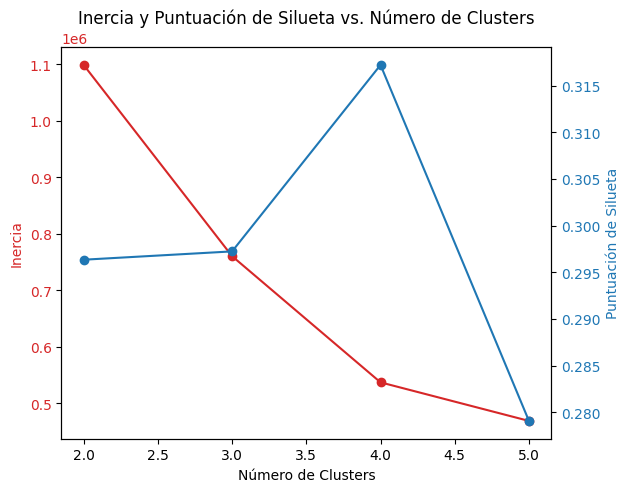

In [ ]:
# Número de agrupaciones
num_clusters = range(2, 6)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfica de la Inercia (eje Y derecho)
color = 'tab:red'
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(num_clusters, inertia, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y (izquierdo) para la puntuación de silueta
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Puntuación de Silueta', color=color)
ax2.plot(num_clusters, silhouette_avg, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar el diseño de la gráfica
fig.tight_layout()
plt.title('Inercia y Puntuación de Silueta vs. Número de Clusters')
plt.show()

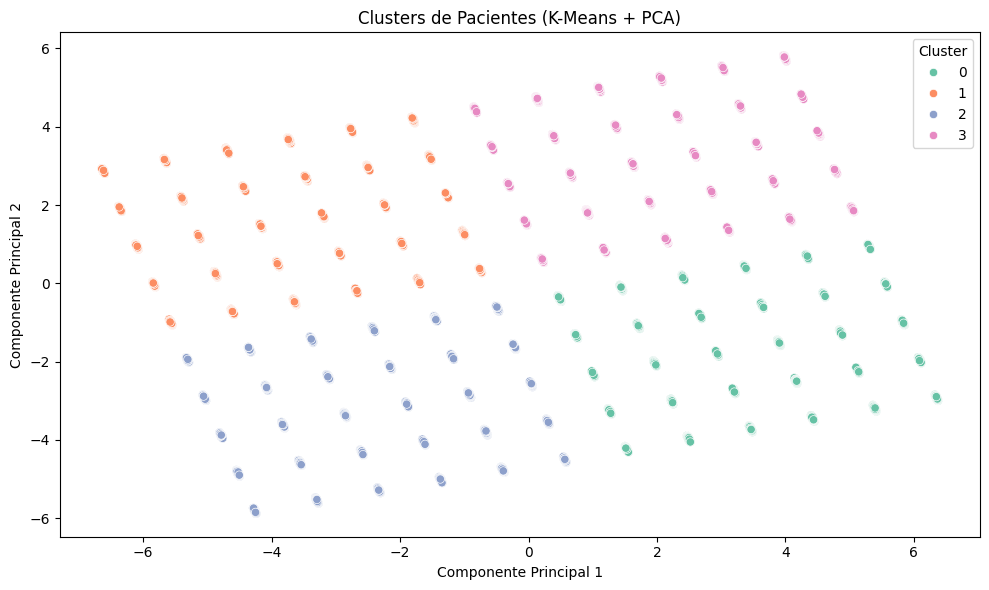

In [ ]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_encoded)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_encoded)

# Agregar los clusters al DataFrame original
df['Cluster'] = clusters

# Crear DataFrame para visualización
df_viz = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = clusters

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Clusters de Pacientes (K-Means + PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Métricas de validación

In [ ]:
inertia = kmeans.inertia_
print(f"Inercia para 4 clusters: {inertia}")

Inercia para 4 clusters: 529806.0863153999


In [ ]:
silhouette_avg = silhouette_score(X_encoded, clusters)
print(f"Puntuación de Silueta para 4 clusters: {silhouette_avg}")

Puntuación de Silueta para 4 clusters: 0.31989572040555253


### Uso de PCA para determinar cuales son las mejores variables para correr nuevamente el modelo K-Means

Variables más importantes según PCA (suma de valores absolutos de loadings):
Etapa_Vida_Juventud                                    3.321139
Estado_Civil_R_Soltero                                 3.295516
Etapa_Vida_Adultez                                     3.168456
Nivel_Educativo_R_Secundaria incompleta                3.147689
Tipo_Seguro_R_Subsidiado                               3.102394
Nivel_Educativo_R_Secundaria completa                  3.026135
Nivel_Educativo_R_Educacion Tecnica o Universitaria    2.952849
Estado_Civil_R_Union libre                             2.931872
Tipo_Seguro_R_Otro                                     2.770648
Consume_Parque                                         2.664261
Consume_Bares                                          2.607475
Consume_Vivienda                                       2.600193
Inicio_Tratamiento_R_Voluntario                        2.415389
Consume_InstitucionEducativa                           2.269777
Num_Casos_Rango_Uno        

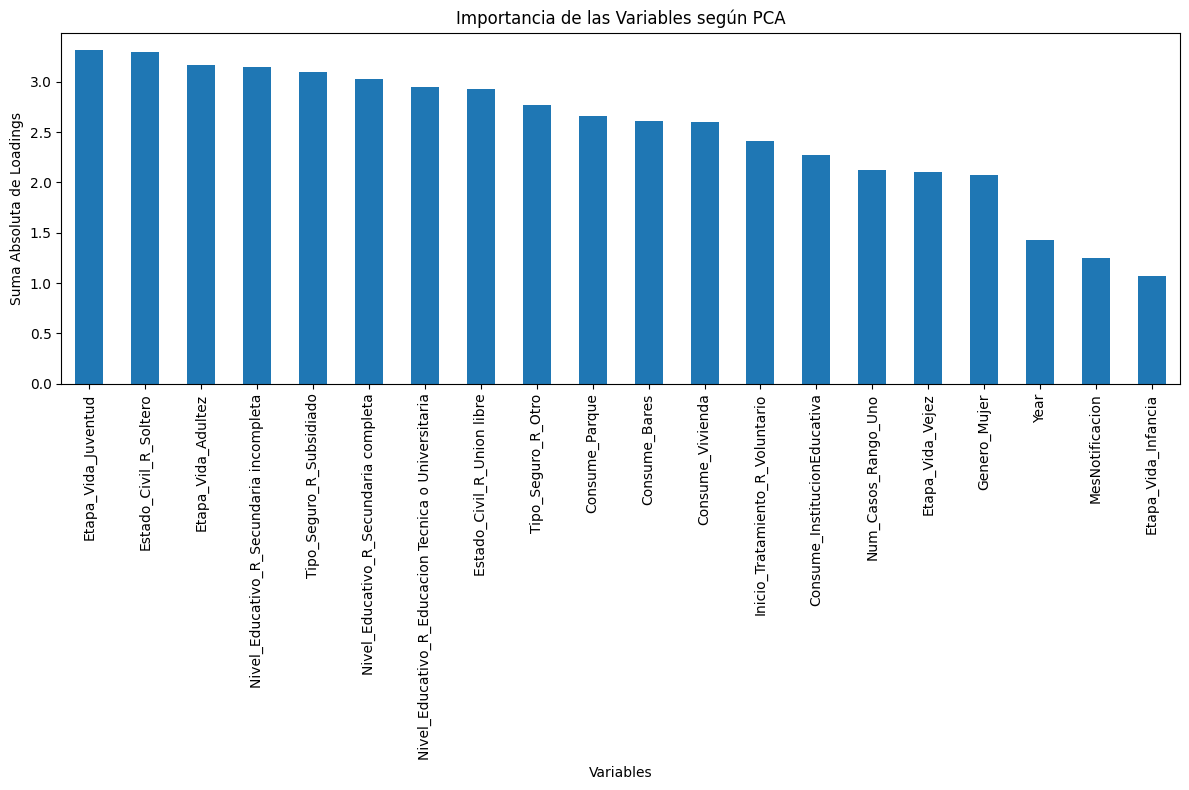

In [ ]:
# Usar PCA para identificar las variables más importantes
pca = PCA()
pca.fit(X_encoded)

# Obtener los autovectores (componentes principales)
components = pca.components_

# Obtener los nombres de las columnas de X_encoded
feature_names = X_encoded.columns

# Calcular la "importancia" de cada característica como la suma del valor absoluto de sus loadings a través de todas las componentes principales
# Esto no es una medida exacta de importancia, pero da una idea de qué variables contribuyen más a la variación total capturada por PCA
feature_importance = np.sum(np.abs(components), axis=0)

# Crear un Series de pandas para visualizar la importancia
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Ordenar las variables por importancia descendente
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Imprimir las variables más importantes
print("Variables más importantes según PCA (suma de valores absolutos de loadings):")
print(sorted_feature_importance)

# Visualizar la importancia de las variables
plt.figure(figsize=(12, 8))
sorted_feature_importance.plot(kind='bar')
plt.title('Importancia de las Variables según PCA')
plt.xlabel('Variables')
plt.ylabel('Suma Absoluta de Loadings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Seleccionar las top N variables para usar en K-Means
n_top_features = 8
top_features = sorted_feature_importance.head(n_top_features).index.tolist()

print(f"\nTop {n_top_features} variables para K-Means:")
print(top_features)

# Ahora puedes usar X_encoded[top_features] para correr K-Means
X_reduced = X_encoded[top_features]


Top 8 variables para K-Means:
['Etapa_Vida_Juventud', 'Estado_Civil_R_Soltero', 'Etapa_Vida_Adultez', 'Nivel_Educativo_R_Secundaria incompleta', 'Tipo_Seguro_R_Subsidiado', 'Nivel_Educativo_R_Secundaria completa', 'Nivel_Educativo_R_Educacion Tecnica o Universitaria', 'Estado_Civil_R_Union libre']


In [ ]:
# Correr el análisis del codo y K-Means con este subconjunto de variables para ver si mejora los resultados.

inertia_reduced = []
silhouette_avg_reduced = []
for i in range(2, 6):
     kmeans_reduced = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
     kmeans_reduced.fit(X_reduced)
     inertia_reduced.append(kmeans_reduced.inertia_)
     if i > 1:
         silhouette_avg_reduced.append(silhouette_score(X_reduced, kmeans_reduced.labels_))

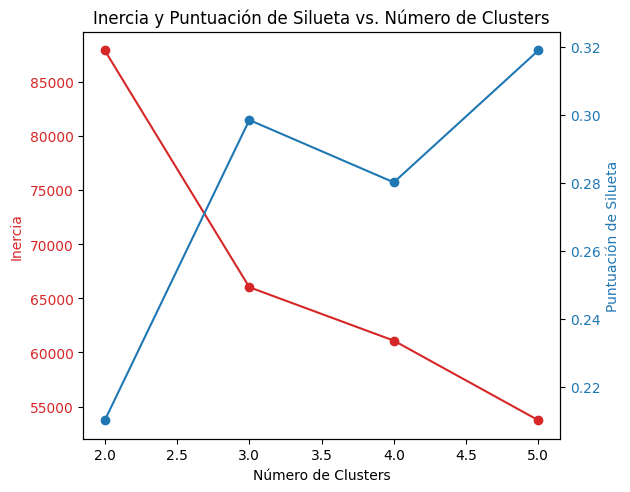

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfica de la Inercia (eje Y derecho)
color = 'tab:red'
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(num_clusters, inertia_reduced, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y (izquierdo) para la puntuación de silueta
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Puntuación de Silueta', color=color)
ax2.plot(num_clusters, silhouette_avg_reduced, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar el diseño de la gráfica
fig.tight_layout()
plt.title('Inercia y Puntuación de Silueta vs. Número de Clusters')
plt.show()

In [ ]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=8)
clusters_reduced = kmeans_final.fit_predict(X_reduced)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


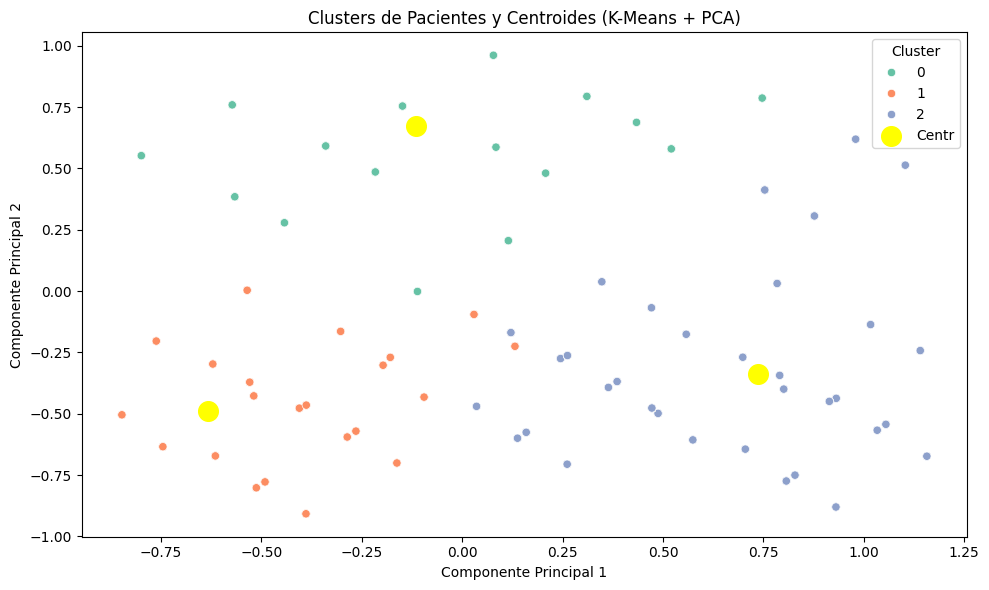

In [ ]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_reduced)

# Agregar los clusters al DataFrame original
df['Cluster'] = clusters_reduced

# Crear DataFrame para visualización
df_viz = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = clusters_reduced

# Calcular los centroides
centroids = kmeans_final.cluster_centers_
centroids_pca = pca.transform(centroids)

# Graficar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Clusters de Pacientes (K-Means + PCA)')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='yellow', label='Centr')
plt.title('Clusters de Pacientes y Centroides (K-Means + PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_reduced)

## Visualising the clusters

In [ ]:
df["label"] = y_kmeans
#The data with labels
df.head()

,Year,Genero,Localidad,MesNotificacion,Tipo_Seguro,Consume_Vivienda,Consume_Parque,Consume_InstitucionEducativa,Consume_Bares,Consume_ViaPublica,...,EstadoCivil,Num_Casos,Num_Casos_Rango,Localidad_R,Tipo_Seguro_R,Nivel_Educativo_R,Inicio_Tratamiento_R,Estado_Civil_R,Cluster,label
0,2015,Hombre,Usme,1,Contributivo,0,1,0,0,0,...,1. Soltero (a),1,Uno,Usme,Contributivo,Secundaria incompleta,Voluntario,Soltero,0,0
1,2015,Mujer,Suba,4,Contributivo,1,0,0,0,0,...,1. Soltero (a),1,Uno,Suba,Contributivo,Secundaria incompleta,Voluntario,Soltero,0,0
2,2015,Hombre,Puente Aranda,5,Subsidiado,0,0,0,1,1,...,1. Soltero (a),1,Uno,Puente Aranda,Subsidiado,Secundaria incompleta,Otro motivo,Soltero,0,0
3,2015,Mujer,Usaquen,5,Contributivo,0,0,0,1,0,...,1. Soltero (a),1,Uno,Otra,Contributivo,Educacion Tecnica o Universitaria,Voluntario,Soltero,1,1
4,2015,Hombre,Suba,6,Contributivo,0,1,0,0,0,...,1. Soltero (a),12,2 o mas,Suba,Contributivo,Secundaria incompleta,Voluntario,Soltero,0,0


In [ ]:
silhouette_avg_final = silhouette_score(X_reduced, y_kmeans)
print(f"Puntuación de Silueta para 3 clusters: {silhouette_avg_final}")

Puntuación de Silueta para 3 clusters: 0.2985562707446301


In [ ]:
inertia_final = kmeans.inertia_
print(f"Inercia para 3 clusters: {inertia_final}")

Inercia para 4 clusters: 66025.87650443097


In [ ]:
# Exportar el dataframe a formato CSV

df.to_csv('dataframe_exportado.csv', index=False)